# 定义问题 

哪些因素与用户的留存关系密切？又有哪些因素可能导致老用户流失？

# 数据初始化

## 安装并导入工具包

In [1]:
pip install lifelines

Note: you may need to restart the kernel to use updated packages.


In [2]:
# 导入数据包
import numpy as np #导入NumPy
import pandas as pd #导入Pandas
df_member = pd.read_csv('易速鲜花会员留存.csv') #载入数据集
df_member.head() #显示数据头几行

,用户码,性别,玫瑰套餐,紫罗兰套餐,郁金香套餐,百合套餐,康乃馨套餐,胡姬花套餐,生日套餐,情人节套餐,会员卡类型,入会月数,会费支付方式,平均月消费,总消费,已停付会费
0,1,女,是,是,否,是,否,是,是,否,年卡,9,手工转账,65.6,593.3,否
1,2,男,否,否,否,否,否,否,否,是,月卡,9,手工转账,59.9,542.4,否
2,3,男,否,否,否,否,是,否,否,否,月卡,4,就餐时付费,73.9,280.85,是
3,4,男,是,否,否,是,是,否,是,是,月卡,13,就餐时付费,98.0,1237.85,是
4,5,女,否,是,否,否,否,是,是,是,月卡,9,花呗付款,69.4,571.45,否


In [3]:
df_member.describe()

,用户码,入会月数,平均月消费
count,7043.000000,7043.000000,7043.000000
mean,3522.000000,32.371149,64.761692
std,2033.283305,24.559481,30.090047
min,1.000000,0.000000,18.250000
25%,1761.500000,9.000000,35.500000
50%,3522.000000,29.000000,70.350000
75%,5282.500000,55.000000,89.850000
max,7043.000000,72.000000,118.750000


## 数据清洗

In [4]:
from pandas.api.types import is_numeric_dtype #导入is_numeric_dtype工具
is_numeric_dtype(df_member['总消费']) #是否为数值字段？

False

在这段代码中，首先从`pandas`库中导入了一个名为`is_numeric_dtype`的工具。`pandas`是一个用于数据操作和分析的Python库，它提供了许多方便的数据结构和处理方法。

接下来，在第二行代码中使用`is_numeric_dtype()`函数来检查`df_member`数据框（DataFrame）中的`'总消费'`列是否由数值类型的数据组成。如果该列全由数值类型（整数或浮点数）组成，则此函数将返回`True`；否则，返回 `False`。

简而言之，这段代码的目的是检查一个DataFrame中的某一列是否为数值类型的数据，在后续分析中，确定这一点可能非常关键，例如，当我们需要对数据进行数值计算时。

In [5]:
df_member['总消费'] = pd.to_numeric(df_member['总消费'], errors='coerce') #把总消费字段转换成数值字段
df_member['总消费'].fillna(0, inplace=True) #补充0值

这两行代码执行了两个操作来处理`df_member`数据框（DataFrame）中的`'总消费'`列。

1. 第一行代码使用`pd.to_numeric()`函数将`'总消费'`列转换为数值类型。函数中的`errors='coerce'`参数表示，如果在转换过程中遇到无法转换为数值类型的值（例如文本或空值），则将这些值强制替换为`NaN`（Not a Number）。这样一来，`'总消费'`列将完全由数值类型的数据组成。

2. 第二行代码使用`fillna()`函数来替换`'总消费'`列中的所有`NaN`值。在此例中，将它们替换为0。`inplace=True`表示在原始数据框（`df_member`）上直接进行修改，而不是返回一个新的数据框。这样，所有的`NaN`值都将被0替换，数据就进一步清洗处理过了。

总的来说，这两行代码将`'总消费'`列转换为全数值类型，并将缺失或非数值类型的数据替换为0，以便于后续的数据分析和处理。

In [6]:
from pandas.api.types import is_numeric_dtype
is_numeric_dtype(df_member['平均月消费'])

True

在这段代码中，你同样使用了`is_numeric_dtype`工具来检查`df_member`数据框（DataFrame）中的`'平均月消费'`列是否为数值类型的数据。

如果`'平均月消费'`列由数值类型（整数或浮点数）组成，则`is_numeric_dtype()`函数将返回`True`；否则，返回`False`。

这对于后续的数据处理和分析可能非常关键，特别是在涉及到数值计算和统计分析时。通过检查某一列是否为数值类型，可以确保数据在接下来的操作中得到正确地处理。

## 数据可视化

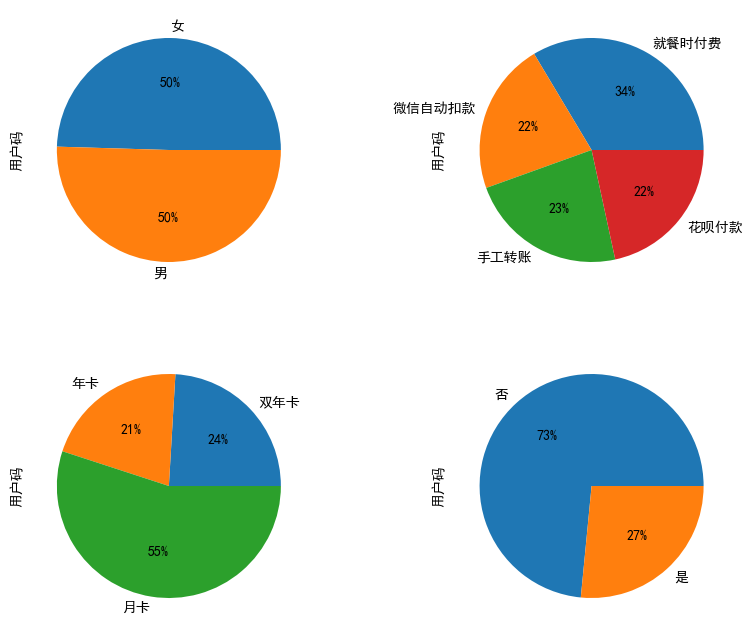

In [7]:
import matplotlib.pyplot as plt #导入绘图工具
plt.rcParams['font.family'] = ['SimHei'] #或者 ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(10,8)) #图片大小
plt.subplot(2, 2, 1) #子图1
ax = df_member.groupby('性别').count()['用户码'].plot.pie(autopct='%1.0f%%') #饼图1
plt.subplot(2, 2, 2) #子图2
ax = df_member.groupby('会费支付方式').count()['用户码'].plot.pie(autopct='%1.0f%%') #饼图2
plt.subplot(2, 2, 3) #子图3
ax = df_member.groupby('会员卡类型').count()['用户码'].plot.pie(autopct='%1.0f%%') #饼图3
plt.subplot(2, 2, 4) #子图4
ax = df_member.groupby('已停付会费').count()['用户码'].plot.pie(autopct='%1.0f%%') #饼图4
plt.show() #显示

这段代码使用`matplotlib`库创建了一个包含四个饼图（子图）的图像，显示了`df_member`数据框（DataFrame）中不同分类变量的分布情况。以下是代码中涉及到的各个部分的说明：

1. 导入`matplotlib.pyplot`绘图工具，简写为`plt`。
2. 使用`plt.figure()`设置整个图像的尺寸，这里设置为10x8英寸。
3. 使用`plt.subplot()`定义子图的位置。函数中的参数`(2, 2, 1)`表示创建一个2x2的子图矩阵，当前子图在第一个位置（左上角）。
4. 使用`groupby()`函数按`'性别'`对数据框进行分组，然后对每个分组统计`'用户码'`的个数，最后使用`plot.pie()`绘制统计结果的饼图。`autopct='%1.0f%%'`设置百分比标签的格式，并自动添加到各个饼块上。
5. 类似地，使用`plt.subplot()`函数创建第二、三、四个子图，分别按`'会费支付方式'`、`'会员卡类型'`和`'已停付会费'`对数据框进行分组、统计与绘图。
6. 最后，使用`plt.show()`显示整个由四个子图（饼图）组成的图像。

这些饼图可以帮助你更好地了解数据集中不同分类变量的分布情况。例如，可以看到不同性别、会费支付方式、会员卡类型和已停付会费的占比情况，为后续的数据分析和建模提供了直观的参考信息。

## 特征工程

In [8]:
# 把汉字转换成0、1值
df_member['已停付会费'].replace(to_replace='是', value=1, inplace=True)
df_member['已停付会费'].replace(to_replace='否',  value=0, inplace=True)
df_member['性别'].replace(to_replace='女', value=0, inplace=True)
df_member['性别'].replace(to_replace='男', value=1, inplace=True)

这段代码是将`df_member`数据框（DataFrame）中的两个分类（类别）列 - `'已停付会费'`和`'性别'` - 转换成数值表示的形式。通常，在机器学习模型中，我们需要将分类数据转换为数值数据，这样模型才能进行处理和分析。这里使用的是简单的二元转换方法，即使用0或1来表示两种不同的类别。

代码片段详细说明如下：

1. 使用`replace()`函数将`'已停付会费'`列中的`'是'`替换为数值`1`。`inplace=True`表示直接对原始数据框进行修改，不会返回新的修改后的数据框。
2. 类似地，将`'已停付会费'`列中的`'否'`替换为数值`0`。
3. 将`'性别'`列中的`'女'`替换为数值`0`。
4. 将`'性别'`列中的`'男'`替换为数值`1`。

完成上述操作后，`df_member`数据框中的`'已停付会费'`和`'性别'`两列都已转换为数值类型（0或1），便于进一步的数据处理和建模。

In [9]:
# 其它的是、否字段转换成布尔型数据
binary_features = ['玫瑰套餐', '紫罗兰套餐', '郁金香套餐', 
                   '百合套餐', '康乃馨套餐', '胡姬花套餐', 
                   '生日套餐','情人节套餐']
for field in binary_features:
    df_member[field] = df_member[field] == '是'

这段代码将`df_member`数据框（DataFrame）中的其他几个分类（类别）列转换成布尔型数据（True或False），这些列为`'玫瑰套餐'`、`'紫罗兰套餐'`等。布尔型数据通常表示两种状态之一，如真/假或是/否，在机器学习模型中很有用。

代码片段详细说明如下：

- 定义包含分类列名的列表`binary_features`。
- 使用`for`循环对列表中的每个列名进行处理：
    - 使用表达式`df_member[field] == '是'`将该列的值转换为布尔型。结果为True（`'是'`的情况）或False（`'否'`的情况）。
    - 将转换后的布尔型数据直接保存回原数据框的对应列。

完成上述操作后，`df_member`数据框中指定的几个分类列都已转换为布尔型数据（True或False）。在模型处理时，通常Python会自动将True/False转换为1/0。如果需要，也可以手动将这些布尔型数据转换为数值类型（如0或1），方法类似于上一次的回答中对`'已停付会费'`和`'性别'`列的处理。

In [10]:
df_member # 显示数据

,用户码,性别,玫瑰套餐,紫罗兰套餐,郁金香套餐,百合套餐,康乃馨套餐,胡姬花套餐,生日套餐,情人节套餐,会员卡类型,入会月数,会费支付方式,平均月消费,总消费,已停付会费
0,1,0,True,True,False,True,False,True,True,False,年卡,9,手工转账,65.60,593.30,0
1,2,1,False,False,False,False,False,False,False,True,月卡,9,手工转账,59.90,542.40,0
2,3,1,False,False,False,False,True,False,False,False,月卡,4,就餐时付费,73.90,280.85,1
3,4,1,True,False,False,True,True,False,True,True,月卡,13,就餐时付费,98.00,1237.85,1
4,5,0,False,True,False,False,False,True,True,True,月卡,9,花呗付款,69.40,571.45,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7039,0,False,False,True,False,False,True,False,False,年卡,13,手工转账,55.15,742.90,0
7039,7040,1,False,False,False,True,False,False,False,False,月卡,2,手工转账,50.30,92.75,0
7040,7041,1,True,False,False,False,False,False,False,True,月卡,22,就餐时付费,85.10,1873.70,1
7041,7042,1,True,True,True,False,True,True,False,True,双年卡,67,手工转账,67.85,4627.65,0


# 运行Kaplan-Meier 生存模型，分析整体留存

我们使用Kaplan-Meier生存曲线来查看普通客户的生存率。
使用下面的代码，我们可以将KM生存曲线拟合到客户流失数据，并以置信区间绘制我们的生存曲线。
生存曲线是累积的。 意思是，在下图中，在20个月后，客户不取消服务的机会刚好超过80％。

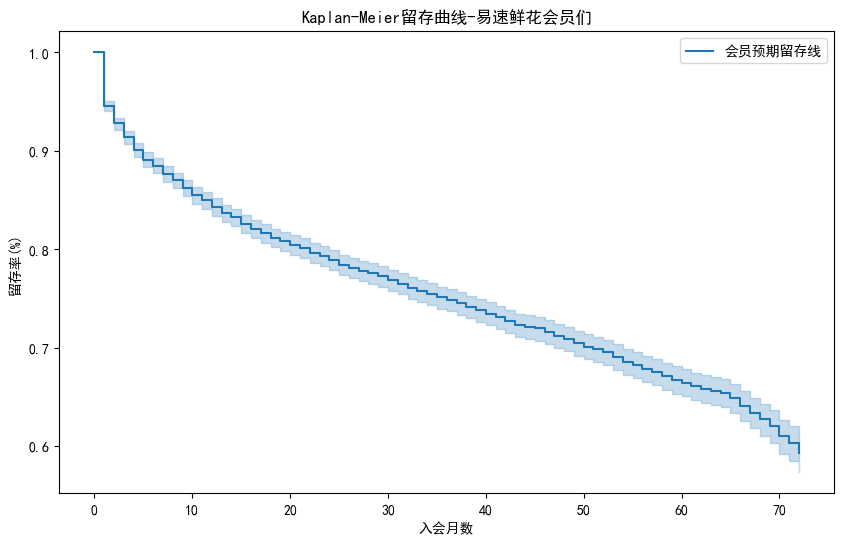

In [11]:
import lifelines #导入生存分析工具包
kmf = lifelines.KaplanMeierFitter() #创建KMF模型
kmf.fit(df_member['入会月数'], #拟合易速鲜花会员流失数据
        event_observed=df_member['已停付会费'], 
        label='会员预期留存线')
fig, ax = plt.subplots(figsize=(10,6)) #画布
kmf.plot(ax=ax) #绘图
ax.set_title('Kaplan-Meier留存曲线-易速鲜花会员们') #图题
ax.set_xlabel('入会月数') #X轴标签
ax.set_ylabel('留存率(%)') #Y轴标签
plt.show() #显示图片

这段代码导入了一个名为 [lifelines](https://lifelines.readthedocs.io/en/latest/) 的生存分析（Survival Analysis）Python库，并使用库中的 [Kaplan-Meier](https://en.wikipedia.org/wiki/Kaplan%E2%80%93Meier_estimator) 方法来拟合易速鲜花会员的流失数据。Kaplan-Meier方法用于估计不同时间点的会员留存情况。代码的步骤如下：

1. 导入`lifelines`库。
2. 创建一个Kaplan-Meier Fitter对象（`kmf = lifelines.KaplanMeierFitter()`）。
3. 使用`kmf.fit()`方法拟合数据。需要传入两个参数：
    - `df_member['入会月数']`：表示会员入会的月份数。
    - `event_observed=df_member['已停付会费']`：表示是否停止付费的事件，用1和0表示。
    - `label='会员预期留存线'`：用于之后绘制留存曲线时的图例标签。
4. 使用`matplotlib`的`subplots`创建画布和轴对象，并设置画布尺寸为10x6。
5. 使用`kmf.plot(ax=ax)`将拟合后的Kaplan-Meier留存曲线绘制到轴对象上。
6. 设置图表标题、x轴和y轴的标签。
7. 使用`plt.show()`显示绘制的图片。

图表结果显示了易速鲜花会员随着入会时长的增加，留存率的变化情况。这对于分析会员流失情况以及改善会员服务策略具有参考价值。

## 按照不同的类别比较生存曲线

In [12]:
def life_by_cat(feature, t='入会月数', event='已停付会费', df=df_member, ax=None): #定义分类留存曲线函数
    for cat in df[feature].unique(): #遍历类别
        idx = df[feature] == cat #当前类别
        kmf = lifelines.KaplanMeierFitter() #创建KaplanMeier模型
        kmf.fit(df[idx][t], event_observed=df[idx][event], label=cat) #拟合模型
        kmf.plot(ax=ax, label=cat) #绘图

这段代码定义了一个名为`life_by_cat`的函数，用于根据指定的分类特征（`feature`）绘制Kaplan-Meier留存曲线。函数的输入参数为：

- `feature`：用于分类的特征列名。
- `t`：表示会员入会的月份列（默认为`'入会月数'`）。
- `event`：表示是否停止付费的事件列（默认为`'已停付会费'`）。
- `df`：数据框（默认为`df_member`）。
- `ax`：可选的轴对象，如果提供，将在此轴上绘制图形。这对于将多个绘图组合在一个图中很有用。

函数的处理过程如下：

1. 使用`for`循环遍历指定特征列（`feature`）的唯一值（不重复的类别）。
2. 通过`idx = df[feature] == cat`创建一个布尔掩码（索引），表示数据框（`df`）中指定特征列为当前类别（`cat`）的行。
3. 创建一个Kaplan-Meier Fitter对象（`lifelines.KaplanMeierFitter()`）。
4. 使用`kmf.fit()`方法拟合数据。传入两个参数：
    - `df[idx][t]`：表示当前类别下的会员入会月数。
    - `event_observed=df[idx][event]`：表示当前类别下的停止付费事件（用1和0表示）。
    - `label=cat`：图例标签，用当前类别值填充。
5. 使用`kmf.plot(ax=ax, label=cat)`将拟合后的Kaplan-Meier留存曲线绘制到轴对象上。

使用 `life_by_cat` 函数，您可以轻松地针对不同分类特征绘制Kaplan-Meier留存曲线。

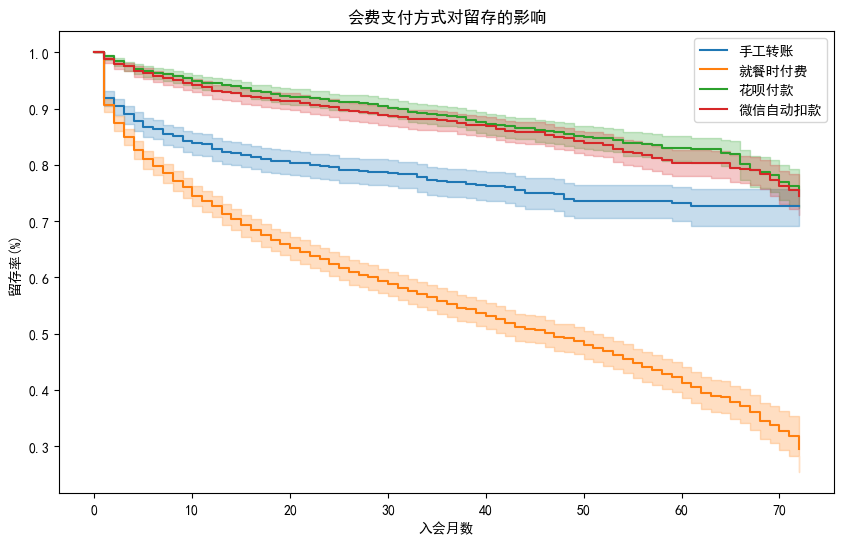

In [13]:
fig_pmt, ax_pmt = plt.subplots(figsize=(10,6)) #画布
life_by_cat(feature='会费支付方式', ax=ax_pmt) #调用函数
ax_pmt.set_title('会费支付方式对留存的影响') #图题
ax_pmt.set_xlabel('入会月数') #X轴标签
ax_pmt.set_ylabel('留存率(%)') #Y轴标签
plt.show() #显示图片

这段代码使用了先前定义的 `life_by_cat` 函数根据不同的会费支付方式（`'会费支付方式'`列）绘制Kaplan-Meier留存曲线。步骤如下：

1. 使用`matplotlib`的`subplots`创建画布和轴对象，并设置画布尺寸为10x6。
2. 调用`life_by_cat`函数，传入特征列名`'会费支付方式'`作为分类特征和刚创建的轴对象`ax_pmt`。这将依据会费支付方式绘制留存曲线。
3. 设置图表标题、x轴和y轴的标签。
4. 使用`plt.show()`显示图片。

图表结果显示了不同会费支付方式下会员随着入会时长的增加，留存率的变化情况。这有助于分析不同支付方式对会员留存的影响，从而为制定会员服务策略提供参考。

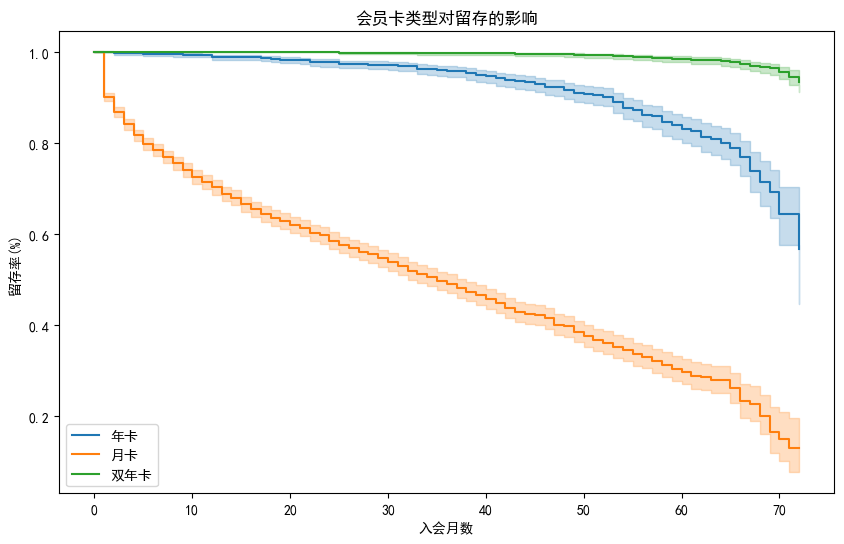

In [14]:
fig_contract, ax_contract = plt.subplots(figsize=(10,6)) #画布
life_by_cat(feature='会员卡类型', ax=ax_contract) #调用函数
ax_contract.set_title('会员卡类型对留存的影响') #图题
ax_contract.set_xlabel('入会月数') #X轴标签
ax_contract.set_ylabel('留存率(%)') #Y轴标签
plt.show() #显示图片

这段代码与前面的示例类似，唯一的区别是使用了`'会员卡类型'`列作为分类特征来绘制Kaplan-Meier留存曲线。步骤如下：

1. 使用`matplotlib`的`subplots`创建画布和轴对象，并设置画布尺寸为10x6。
2. 调用`life_by_cat`函数，传入特征列名`'会员卡类型'`作为分类特征和刚创建的轴对象`ax_contract`。这将依据会员卡类型绘制留存曲线。
3. 设置图表标题、x轴和y轴的标签。
4. 使用`plt.show()`显示图片。

图表结果显示了不同会员卡类型持有者随着入会时长的增加，留存率的变化情况。这有助于分析会员卡类型对会员留存的影响，从而为制定会员服务策略提供参考。

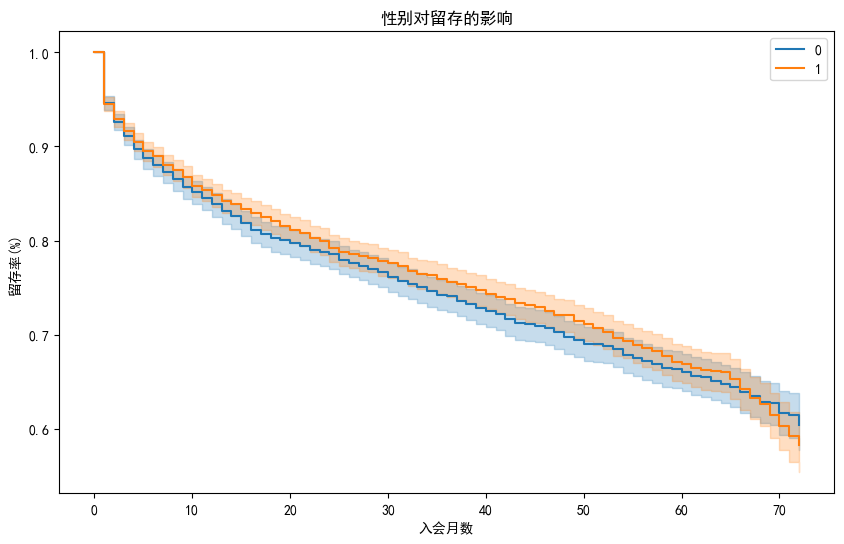

In [15]:
fig_gender, ax_gender = plt.subplots(figsize=(10,6)) #画布
life_by_cat(feature='性别', ax=ax_gender) #调用函数
ax_gender.set_title('性别对留存的影响') #图题
ax_gender.set_xlabel('入会月数') #X轴标签
ax_gender.set_ylabel('留存率(%)') #Y轴标签
plt.show() #显示图片

这段代码与前面的示例类似，唯一的区别是使用了`'性别'`列作为分类特征来绘制Kaplan-Meier留存曲线。步骤如下：

1. 使用`matplotlib`的`subplots`创建画布和轴对象，并设置画布尺寸为10x6。
2. 调用`life_by_cat`函数，传入特征列名`'性别'`作为分类特征和刚创建的轴对象`ax_gender`。这将依据性别绘制留存曲线。
3. 设置图表标题、x轴和y轴的标签。
4. 使用`plt.show()`显示图片。

图表结果显示了不同性别会员随着入会时长的增加，留存率的变化情况。这有助于分析性别对会员留存的影响，从而为制定会员服务策略提供参考。

# 运行Cox 危害系数模型，分析风险因子

为了检查不同功能的影响，我们将使用Cox比例危害模型。 
我们可以将其视为生存回归模型。可以认为“危险”会增加/减少生存机会。 
例如，在我们的业务问题中，危害可能是客户拥有的合同类型。具有多年合同的客户取消合同的频率可能比具有月度合同的客户取消合同的频率低。
一个限制是模型假设各组之间的危害随时间变化的比率是恒定的。 Lifeline为CoxPHFitter对象提供了一个内置的check_assumptions方法。
经过一些数据清理，包括编码分类变量（k-1虚拟变量），我们可以将生存回归模型拟合到数据中。

# 数据整理
先做数据整理工作，把每个数据字段都转换为可以处理的字段

In [16]:
#把分类字段转换为哑编码
category_features = ['会员卡类型', '会费支付方式'] #要转换的分类的字段
df_member = pd.get_dummies(df_member, #哑变量的个数会比总类别数少1 
                           drop_first=True, #这是因为drop_first=True
                           columns=category_features) #这能够避免回归中的多重共线性问题 
df_member #显示数据

,用户码,性别,玫瑰套餐,紫罗兰套餐,郁金香套餐,百合套餐,康乃馨套餐,胡姬花套餐,生日套餐,情人节套餐,入会月数,平均月消费,总消费,已停付会费,会员卡类型_年卡,会员卡类型_月卡,会费支付方式_微信自动扣款,会费支付方式_手工转账,会费支付方式_花呗付款
0,1,0,True,True,False,True,False,True,True,False,9,65.60,593.30,0,1,0,0,1,0
1,2,1,False,False,False,False,False,False,False,True,9,59.90,542.40,0,0,1,0,1,0
2,3,1,False,False,False,False,True,False,False,False,4,73.90,280.85,1,0,1,0,0,0
3,4,1,True,False,False,True,True,False,True,True,13,98.00,1237.85,1,0,1,0,0,0
4,5,0,False,True,False,False,False,True,True,True,9,69.40,571.45,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7039,0,False,False,True,False,False,True,False,False,13,55.15,742.90,0,1,0,0,1,0
7039,7040,1,False,False,False,True,False,False,False,False,2,50.30,92.75,0,0,1,0,1,0
7040,7041,1,True,False,False,False,False,False,False,True,22,85.10,1873.70,1,0,1,0,0,0
7041,7042,1,True,True,True,False,True,True,False,True,67,67.85,4627.65,0,0,0,0,1,0


这段代码用于将包含分类变量的DataFrame（本例为`df_member`，包含会员信息）转换为哑编码（one-hot encoding）。哑编码是一种常用于处理分类变量的技术，它将每个分类特征变量创建成新的二进制（0和1）特征变量。这对于许多机器学习算法来说是非常有用的，因为它们更适合处理数值而不是分类数据。

步骤如下：

1. 定义一个名为`category_features`的列表，包含需要转换为哑编码的分类特征列名：`'会员卡类型'`和`'会费支付方式'`。
2. 使用pandas的`get_dummies`函数将`df_member`中的分类特征转换为哑编码。为避免多重共线性问题（在回归分析中，多重共线性是指模型中的一个或多个特征存在高度相关性），设置`drop_first=True`会使生成的哑变量数量比总类别数少1。例如，如果特征有3个类别，只会生成2个哑变量，而不是3个。
3. 将转换后的DataFrame赋值回`df_member`。
4. 显示更新后的`df_member`。

现在，`df_member`包含了将分类特征转换为数值型哑变量的新数据。接下来可以使用这些数据进行机器学习分析。

## 创建并拟合模型

In [17]:
cph = lifelines.CoxPHFitter() #创建模型
cph.fit(df_member, duration_col='入会月数', #拟合模型
        event_col='已停付会费', show_progress=False)

<lifelines.CoxPHFitter: fitted with 7043 total observations, 5174 right-censored observations>

这段代码使用 `lifelines` 库创建并拟合一个考虑了时间的风险比例模型（Cox proportional hazard model，也称为Cox regression model）。Cox模型是一种在生存分析中非常常用的统计技术，它可以根据多个特征评估个体事件（在本例中为会员停止支付会费的危险性）发生的风险。这使得它很适合分析多个特征对会员留存的影响。

步骤如下：

1. 创建一个Cox比例危险模型实例 `lifelines.CoxPHFitter()`，将其命名为 `cph`。
2. 使用 `cph.fit()` 函数拟合模型，传入以下参数：
  - `df_member`：包含原始数据和之前创建的哑变量特征的 DataFrame。
  - `duration_col`：是入会时间（月份）这一持续时间的列名。
  - `event_col`：是表示“已停止支付会费”的示性事件列名。
  - `show_progress=False`：关闭进度显示，训练过程不会打印进度输出。

这段代码对Cox模型进行了拟合，将训练数据迁移到模型中。接下来可以评估模型性能、解释模型系数等。

## 绘制会员的生存曲线

<Axes: >

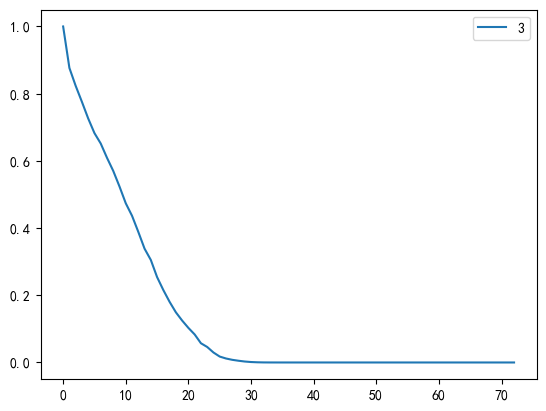

In [18]:
# 生存曲线绘制
cph.predict_survival_function(df_member.loc[3]).plot()

此代码段使用拟合的Cox模型为指定会员（例如，在`df_member`中的索引为 `3`的会员）预测生存曲线，并将其绘制出来。生存曲线表示会员在一段时间内继续保持支付会费的概率。

这里是如何实现的：

1. 使用拟合的Cox模型（`cph`）的 `predict_survival_function()` 方法进行预测。传入包含需要预测的会员信息的单行DataFrame，本例中通过使用 `df_member.loc[3]` 选择索引为 `3`的会员信息。这将根据该会员的特征计算在不同时间点的生存概率。
2. 使用 `plot()` 将预测的生存曲线绘制为图形。横坐标表示时间（入会月数），纵坐标表示生存概率（在该时间点尚未停止支付会费的概率）。

请注意，在实际应用中，您可能需要为多个会员绘制生存曲线，以便更好地了解不同特征组合对会员留存的影响。这可以通过迭代DataFrame中的每一行并分别调用 `predict_survival_function()` 和 `plot()` 实现。

## 分析影响留存的因子

<Axes: title={'center': '各个特征的留存相关系数'}, xlabel='log(HR) (95% CI)'>

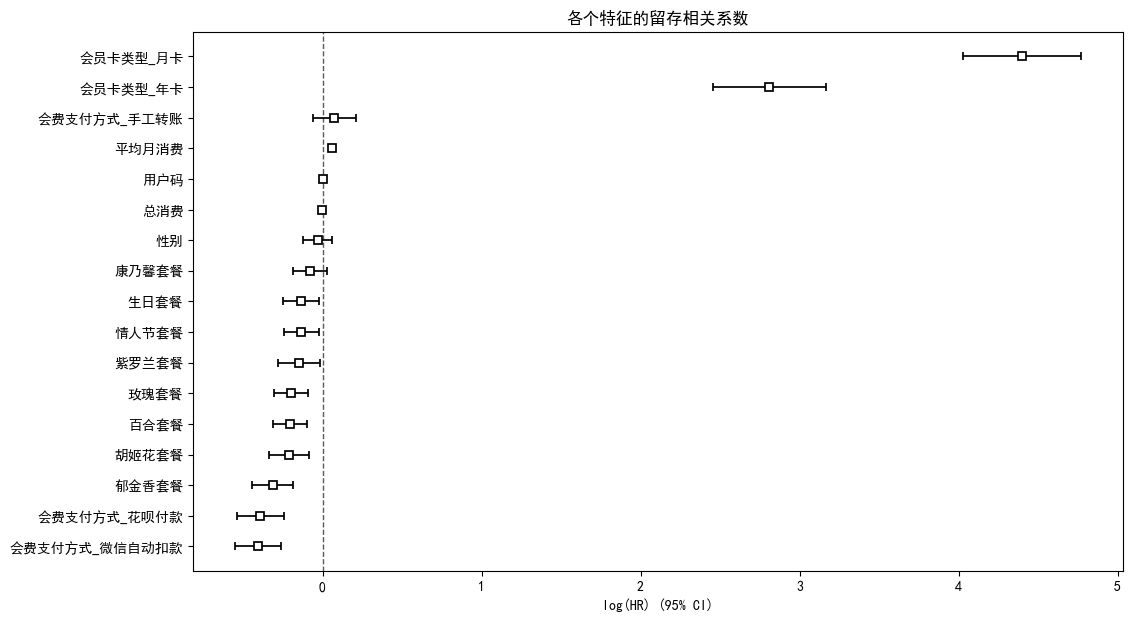

In [19]:
fig, ax = plt.subplots(figsize=(12,7)) #画布
ax.set_title('各个特征的留存相关系数') #图题
cph.plot(ax=ax) #绘图

这段代码绘制了一个条形图，显示了Cox比例风险模型中每个特征与会员留存之间关系的强度。这可以帮助你评估每个特征对预测会员是否继续支付会费的贡献，辅助你找到最重要的特征。

此处是每个步骤的说明：

1. 使用`plt.subplots()`创建一个新的图形和坐标轴。`figsize=(12,7)`定义了图形的尺寸，使其在宽度上为12个单位长度，高度为7个单位长度。
2. 使用`ax.set_title()`为图形设置标题。此处标题为“各个特征的留存相关系数”。
3. 使用`cph.plot(ax=ax)`将训练好的Cox模型（`cph`）的系数（参数）绘制成条形图。`ax=ax`是将绘制的图形与前面创建的坐标轴关联起来。

图形中每个条形表示一个特征的系数。对于Cox比例风险模型中的特征系数（参数），正系数（值大于0）表示该特征与高风险（事件发生的可能性更高，生存概率更低）正相关；负系数（值小于0）表示该特征与低风险（事件发生的可能性更低，生存概率更高）正相关。

再次阐述图形上的柱状图含义：柱状图中的正值特征表示，随着该特征的增加，会员可能提前停止支付会费的风险更高；而负值特征表示，随着该特征的增加，会员可能继续保持支付会费的可能性更高。
